# Number recognition using neural network

In this exercise the goal is building a neural network that allows the recognition of numbers. A set of data called MNIST (Modified National Institute of Standards and Technology) will be used. This contains 70000 handwritten digits between 0 and 9.

## Contents <a id='back'></a>

* [Stage 1. Data loading](#1)
    * [1.1 Data exploration](#1.1)
* [Stage 2. Model building](#2)
    * [2.1 Regression model](#2.1)
    * [2.2 Classification model](#2.2)
    * [2.3 Convolutional Neural Network](#2.3)
* [Conclusion](#conclusion)

## Stage 1. Data loading <a id='1'></a>

In [1]:
# General libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Let's import the dataset from keras (tensorflow based library used by Google to create neural networks)
from keras.datasets import mnist

In [3]:
# download the data
(X_train, y_train),(X_test, y_test) = mnist.load_data()

In [4]:
# shape of train feature dataset
X_train.shape

(60000, 28, 28)

### 1.1 Data exploration <a id='1.1'></a>

<function matplotlib.pyplot.show(close=None, block=None)>

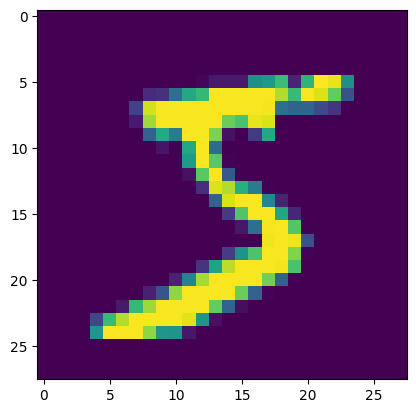

In [5]:
# visualize a random image 
plt.imshow(X_train[0,:,:])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

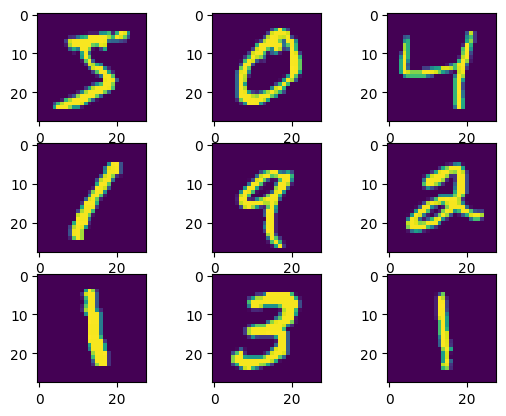

In [6]:
# visualize the first 9 numbers
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i,:,:])
plt.show

Before going into the algorithm of Machine Learning, we have to modify these 60000 matrices in vectors 28x28, so 784 numbers.

In [7]:
X_train_reshaped = X_train.reshape(60000, 28*28)
X_test_reshaped = X_test.reshape(10000, 28*28)

In [8]:
# verifying the new shape
X_train_reshaped.shape

(60000, 784)

In [9]:
# lets see what are the min and max values
print(np.min(X_train_reshaped))
print(np.max(X_train_reshaped))

0
255


So, these numbers range between 0, which means a full black pixel, and 255, which is full white

## Stage 2. Model building <a id='4'></a>

### 2.1 Regression model <a id='2.1'></a>

Now that we know how the dataset is build, we can start building our model:

In [10]:
# import some dependencies from keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

Now, we are going to build the NN with 3 layers: input(784 nodes), hidden(100 nodes) and exit layer(1 node).

In [11]:
# building the neural network
model = Sequential()
model.add(Dense(100,input_shape=(784,)))  # first layer 
model.add(Dense(1))  # exit layer
model.compile(optimizer='adam', loss='mae', metrics=['mae']) # adam is an adaptive optimizer that uses stochastic gradient descent to find the best parameters
model.fit(X_train_reshaped, y_train, 
            validation_data=(X_test_reshaped, y_test),
            epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 15.8151 - mae: 15.8151 - val_loss: 3.7754 - val_mae: 3.7754
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.8111 - mae: 2.8111 - val_loss: 2.0185 - val_mae: 2.0185
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7632 - mae: 1.7632 - val_loss: 1.9322 - val_mae: 1.9322
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7137 - mae: 1.7137 - val_loss: 1.5561 - val_mae: 1.5561
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6817 - mae: 1.6817 - val_loss: 1.5784 - val_mae: 1.5784
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6732 - mae: 1.6732 - val_loss: 1.6501 - val_mae: 1.6501
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6582 - mae: 1.6582 - val_loss: 1.6598 - val_mae: 1.6598
Epoch 8/10
1875/1875 [==============================] - 3s 2

We can see that mae (mean absolute error) decreases every epoch. This is good.

In [12]:
# let's see what the model predicts
y_pred = model.predict(X_test_reshaped)

313/313 [==============================] - 0s 1ms/step


In [13]:
y_pred[0:10]

array([[8.200553  ],
       [2.528924  ],
       [0.97451717],
       [1.6893017 ],
       [3.1542768 ],
       [1.3937027 ],
       [6.926484  ],
       [4.3199105 ],
       [3.4854026 ],
       [9.972945  ]], dtype=float32)

We see decimal numbers and this is not what we want. So we apply a round.

In [14]:
y_pred = np.around(model.predict(X_test_reshaped))
y_pred[0:10]

313/313 [==============================] - 0s 1ms/step


array([[ 8.],
       [ 3.],
       [ 1.],
       [ 2.],
       [ 3.],
       [ 1.],
       [ 7.],
       [ 4.],
       [ 3.],
       [10.]], dtype=float32)

In [15]:
# let's compare our predictions with the real data
score_regr = np.mean(y_pred == y_test)
print(score_regr)

0.09527549


So we have an accuracy of around 10%, really bad. Far worse than a casual model

In [16]:
# Create a data frame named "summary_models" where we save information of different models
summary_models = pd.DataFrame(columns=['Score'])

# Save info
summary_models.loc['Regression'] = {'Score': score_regr}

What we do now is introducing a activation function. We'll use ReLU. This gets a non-linearity in our model.

In [17]:
# building the neural network
model = Sequential()
model.add(Dense(100,input_shape=(784,)))  # first layer 
model.add(Activation('relu'))
model.add(Dense(1))  # exit layer
model.compile(optimizer='adam', loss='mae', metrics=['mae']) # adam is an adaptive optimizer that uses stochastic gradient descent to find the best parameters
model.fit(X_train_reshaped, y_train, 
            validation_data=(X_test_reshaped, y_test),
            epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 3.0313 - mae: 3.0313 - val_loss: 1.0304 - val_mae: 1.0304
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9816 - mae: 0.9816 - val_loss: 0.8937 - val_mae: 0.8937
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9220 - mae: 0.9220 - val_loss: 0.9473 - val_mae: 0.9473
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8796 - mae: 0.8796 - val_loss: 0.8593 - val_mae: 0.8593
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8508 - mae: 0.8508 - val_loss: 0.8421 - val_mae: 0.8421
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8298 - mae: 0.8298 - val_loss: 0.9755 - val_mae: 0.9755
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8074 - mae: 0.8074 - val_loss: 0.7928 - val_mae: 0.7928
Epoch 8/10
1875/1875 [==============================] - 3s 2ms

Cool, with the activation function the mae is half compared with before.

In [18]:
y_pred = np.around(model.predict(X_test_reshaped))[:,0]

313/313 [==============================] - 0s 1ms/step


In [19]:
score_activ = np.mean(y_pred == y_test)
print(score_activ)

0.4655


So, ReLU give us a huge step forward, since our accuracy is over 40%.

In [20]:
# Save info
summary_models.loc['Regression with ReLU'] = {'Score': score_activ}

Lets keep improving the model. We scale our variables:

In [21]:
X_train_scaled = X_train_reshaped/255
X_test_scaled = X_test_reshaped/255

In [22]:
# finding the new min and max value in the scaled dataset
print(np.min(X_train_scaled))
print(np.max(X_train_scaled))

0.0
1.0


Lets train the new NN with these scaled data:

In [23]:
model = Sequential()

model.add(Dense(100,input_shape=(784,)))  # first layer 
model.add(Activation('relu'))

model.add(Dense(1))  # exit layer

model.compile(optimizer='adam', loss='mae', metrics=['mae']) # adam is an adaptive optimizer that uses stochastic gradient descent to find the best parameters

model.fit(X_train_scaled, y_train, 
            validation_data=(X_test_scaled, y_test),
            epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.0179 - mae: 1.0179 - val_loss: 0.7692 - val_mae: 0.7692
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7047 - mae: 0.7047 - val_loss: 0.6684 - val_mae: 0.6684
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6312 - mae: 0.6312 - val_loss: 0.6241 - val_mae: 0.6241
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5855 - mae: 0.5855 - val_loss: 0.5769 - val_mae: 0.5769
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5565 - mae: 0.5565 - val_loss: 0.5565 - val_mae: 0.5565
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5306 - mae: 0.5306 - val_loss: 0.5691 - val_mae: 0.5691
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5162 - mae: 0.5162 - val_loss: 0.5333 - val_mae: 0.5333
Epoch 8/10
1875/1875 [==============================] - 3s 2ms

way better than before. Look at the mae !

In [24]:
y_pred = np.around(model.predict(X_test_scaled))[:,0]

313/313 [==============================] - 0s 990us/step


In [25]:
score_scaled = np.mean(y_pred == y_test)
print(score_scaled)

0.6792


In [26]:
# Save info
summary_models.loc['Regression with ReLU + scaled data'] = {'Score': score_scaled}

So, we finally get a score of around 70% accuracy. Not bad.

At this point, we realize that the model we worked on is wrong because we are dealing with a classification problem using a regression model. This because at the output we have a float number. So, lets change direction.

### 2.2 Classification model <a id='2.2'></a>

From now on, we face this problem as a classification problem:

In [27]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

To deal in the right way with a classification problem we have to transform 'y_train' in a matrix in which every figure corresponds to a column.

In [28]:
pd.get_dummies(y_train)

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,1,0
59996,0,0,0,1,0,0,0,0,0,0
59997,0,0,0,0,0,1,0,0,0,0
59998,0,0,0,0,0,0,1,0,0,0


for example, the first number in y_train is 5, so in the first row only the '5' column contains 1, the second number in y_train is 0, so in the second row only the '0' column contains 1 etc.

In [29]:
# converting y_train and y_test in dummy variables
y_train_dummies = pd.get_dummies(y_train)
y_test_dummies = pd.get_dummies(y_test)

So the new training will be done using 'y_train_dummies' and 'y_test_dummies'. Furthermore we use another loss function 'categorical_crossentropy', the exit layer will have 10 exit nodes and we add softmax activation function at the exit layer

In [30]:
model = Sequential()

model.add(Dense(100,input_shape=(784,)))  # first layer 
model.add(Activation('relu'))

model.add(Dense(10))  # exit layer
model.add(Activation('softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # adam is an adaptive optimizer that uses stochastic gradient descent to find the best parameters

model.fit(X_train_scaled, y_train_dummies, 
            validation_data=(X_test_scaled, y_test_dummies),
            epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2740 - accuracy: 0.9229 - val_loss: 0.1472 - val_accuracy: 0.9556
Epoch 2/10
1875/1875 [==============================] - 2s 980us/step - loss: 0.1240 - accuracy: 0.9637 - val_loss: 0.1044 - val_accuracy: 0.9675
Epoch 3/10
1875/1875 [==============================] - 2s 964us/step - loss: 0.0874 - accuracy: 0.9738 - val_loss: 0.0923 - val_accuracy: 0.9691
Epoch 4/10
1875/1875 [==============================] - 2s 964us/step - loss: 0.0660 - accuracy: 0.9802 - val_loss: 0.0797 - val_accuracy: 0.9753
Epoch 5/10
1875/1875 [==============================] - 2s 952us/step - loss: 0.0529 - accuracy: 0.9837 - val_loss: 0.0770 - val_accuracy: 0.9758
Epoch 6/10
1875/1875 [==============================] - 2s 978us/step - loss: 0.0427 - accuracy: 0.9869 - val_loss: 0.0791 - val_accuracy: 0.9751
Epoch 7/10
1875/1875 [==============================] - 2s 963us/step - loss: 0.0333 - accuracy: 0.9902 - val_loss: 0.0778 - v

traning accuracy is pretty good! lets now evaluate the predictions:

In [31]:
y_pred = np.argmax(model.predict(X_test_scaled),axis=1)

y_pred.shape

313/313 [==============================] - 1s 2ms/step


(10000,)

In [32]:
score_classif = np.mean(y_pred == y_test)
print(score_classif)

0.9769


In [33]:
# Save info
summary_models.loc['Classification with 1 layer and 100 nodes'] = {'Score': score_classif}

Cool, we've achieved a score of almost 98% with a simple NN (only one hidden layer). So at the end, the three modification 'cross function', 'dummy variables' and 'softmax' activation made us skip from 68 to 98% score.

Lets push even further, trying to increase the score above 99%. First thing we can do is increase the network depth.

In [34]:
model = Sequential()

# first layer 
model.add(Dense(1000,input_shape=(784,)))
model.add(Activation('relu'))

# second layer 
model.add(Dense(1000))  # second layer 
model.add(Activation('relu'))

# exit layer
model.add(Dense(10))  
model.add(Activation('softmax'))

# adam is an adaptive optimizer that uses stochastic gradient descent to find the best parameters
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 

history = model.fit(X_train_scaled, y_train_dummies, 
            validation_data=(X_test_scaled, y_test_dummies),
            epochs=30)

Epoch 1/30
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1806 - accuracy: 0.9447 - val_loss: 0.0961 - val_accuracy: 0.9700
Epoch 2/30
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0812 - accuracy: 0.9747 - val_loss: 0.0920 - val_accuracy: 0.9708
Epoch 3/30
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0593 - accuracy: 0.9817 - val_loss: 0.0790 - val_accuracy: 0.9760
Epoch 4/30
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0445 - accuracy: 0.9862 - val_loss: 0.0759 - val_accuracy: 0.9790
Epoch 5/30
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0365 - accuracy: 0.9880 - val_loss: 0.0826 - val_accuracy: 0.9802
Epoch 6/30
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0318 - accuracy: 0.9907 - val_loss: 0.0867 - val_accuracy: 0.9784
Epoch 7/30
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0275 - accuracy: 0.9917 - val_loss: 0.1083 -

in this case it is not very explicit but after the epoch 20, little by little the score in the training set increases but on the validation set the score decreases. So, we are in a situation of overfitting

<function matplotlib.pyplot.show(close=None, block=None)>

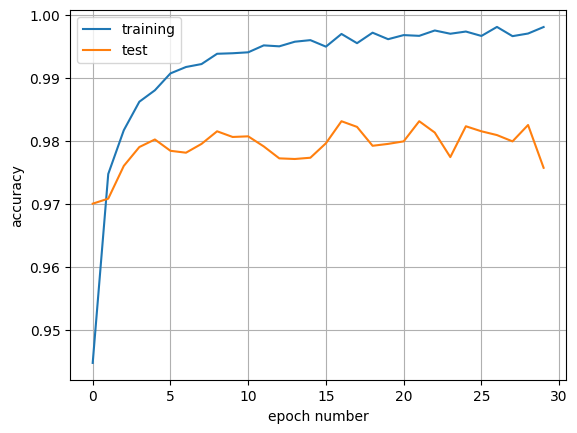

In [35]:
plt.plot(history.history['accuracy'], label='training')
plt.plot(history.history['val_accuracy'], label='test')
plt.grid()
plt.legend()
plt.xlabel('epoch number')
plt.ylabel('accuracy')
plt.show

In [36]:
y_pred = np.argmax(model.predict(X_test_scaled),axis=1)
y_pred

313/313 [==============================] - 1s 4ms/step


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [37]:
score_classif_deep = np.mean(y_pred == y_test)
print(score_classif_deep)

0.9757


In [38]:
# Save info
summary_models.loc['Classification with 2 layers and 1000 nodes'] = {'Score': score_classif_deep}

The overall score is 98%. From now on the challenge is understanding how to deal with overfitting.

The first thing we do is implementing the dropout function. This allows to ignore some nodes during the training stage and thus reducing the size of the network and the likelihood of overfitting

In [39]:
model = Sequential()

# first layer 
model.add(Dense(1000,input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# second layer 
model.add(Dense(1000))  # second layer 
model.add(Activation('relu'))
model.add(Dropout(0.5))

# exit layer
model.add(Dense(10))  
model.add(Activation('softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# adam is an adaptive optimizer that uses stochastic gradient descent to find the best parameters

history = model.fit(X_train_scaled, y_train_dummies, 
            validation_data=(X_test_scaled, y_test_dummies),
            epochs=30)

Epoch 1/30
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2755 - accuracy: 0.9151 - val_loss: 0.1633 - val_accuracy: 0.9481
Epoch 2/30
1875/1875 [==============================] - 29s 16ms/step - loss: 0.1629 - accuracy: 0.9516 - val_loss: 0.0955 - val_accuracy: 0.9696
Epoch 3/30
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1392 - accuracy: 0.9594 - val_loss: 0.0847 - val_accuracy: 0.9751
Epoch 4/30
1875/1875 [==============================] - 29s 16ms/step - loss: 0.1288 - accuracy: 0.9624 - val_loss: 0.1001 - val_accuracy: 0.9701
Epoch 5/30
1875/1875 [==============================] - 31s 17ms/step - loss: 0.1208 - accuracy: 0.9655 - val_loss: 0.0872 - val_accuracy: 0.9738
Epoch 6/30
1875/1875 [==============================] - 31s 17ms/step - loss: 0.1152 - accuracy: 0.9672 - val_loss: 0.0822 - val_accuracy: 0.9769
Epoch 7/30
1875/1875 [==============================] - 31s 17ms/step - loss: 0.1093 - accuracy: 0.9692 - val_loss: 0.0862 -

<function matplotlib.pyplot.show(close=None, block=None)>

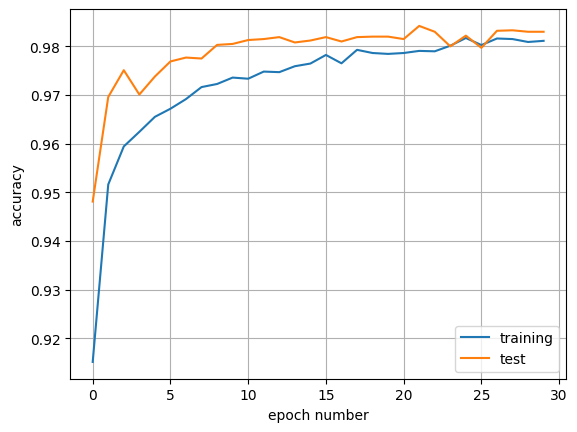

In [40]:
plt.plot(history.history['accuracy'], label='training')
plt.plot(history.history['val_accuracy'], label='test')
plt.grid()
plt.legend()
plt.xlabel('epoch number')
plt.ylabel('accuracy')
plt.show

we can see that the overfitting is gone beacause we have a similar accuracy in training and test. To be more specific, the test accuracy is greater than training, so we probably exaggerated with dropout. Lets repeat the model training with dropout=0.4

we will change some more details. Since the training lasts many epochs, the network will inevitably overfit (so memorizing data). To avoid this, we can use the so called callbacks. This could be the EarlyStopping (meaning that the network can stop after a certain number of epochs if there's no improvement on the val_accuracy)

In [41]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [42]:
model = Sequential()

# first layer 
model.add(Dense(1000,input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.4))

# second layer 
model.add(Dense(1000))  # second layer 
model.add(Activation('relu'))
model.add(Dropout(0.4))

# exit layer
model.add(Dense(10))  
model.add(Activation('softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # adam is an adaptive optimizer that uses stochastic gradient descent to find the best parameters

early_stopping_monitor = EarlyStopping(patience=5, monitor='val_accuracy')  

# with this callback, we save the best model (the one with the highest validation accuracy)
model_checkpoint_callback = ModelCheckpoint(filepath='best_model.hdf5', 
                                                monitor='val_accuracy', 
                                                mode='auto', 
                                                save_best_only=True,
                                                verbose=1)

history = model.fit(X_train_scaled, y_train_dummies, 
            validation_data=(X_test_scaled, y_test_dummies),
            epochs=30,
            callbacks=[early_stopping_monitor, model_checkpoint_callback])

Epoch 1/30
1875/1875 [==============================] - ETA: 0s - loss: 0.2433 - accuracy: 0.9253
Epoch 1: val_accuracy improved from -inf to 0.96170, saving model to best_model.hdf5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2433 - accuracy: 0.9253 - val_loss: 0.1176 - val_accuracy: 0.9617
Epoch 2/30
1874/1875 [============================>.] - ETA: 0s - loss: 0.1365 - accuracy: 0.9594
Epoch 2: val_accuracy improved from 0.96170 to 0.97140, saving model to best_model.hdf5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.1365 - accuracy: 0.9594 - val_loss: 0.0957 - val_accuracy: 0.9714
Epoch 3/30
1872/1875 [============================>.] - ETA: 0s - loss: 0.1131 - accuracy: 0.9671
Epoch 3: val_accuracy improved from 0.97140 to 0.97470, saving model to best_model.hdf5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.1132 - accuracy: 0.9671 - val_loss: 0.0853 - val_accuracy: 0.9747
Epoch 4/30
1874/1875 [==================

<function matplotlib.pyplot.show(close=None, block=None)>

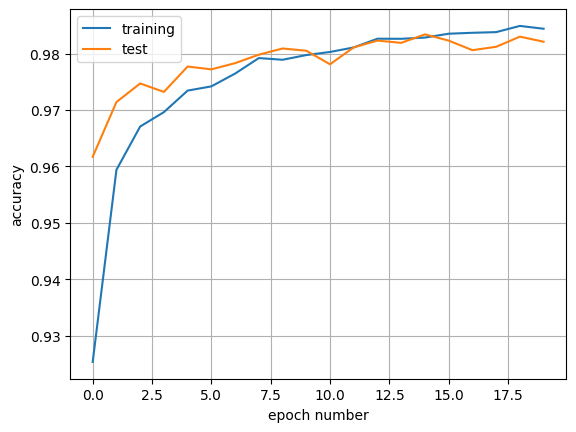

In [43]:
plt.plot(history.history['accuracy'], label='training')
plt.plot(history.history['val_accuracy'], label='test')
plt.grid()
plt.legend()
plt.xlabel('epoch number')
plt.ylabel('accuracy')
plt.show

ok, there is not overfitting but just a soft discrepancy between training and test

In [44]:
# loading the best model just found
from keras.models import load_model
best_model = load_model('best_model.hdf5')

y_pred = np.argmax(best_model.predict(X_test_scaled),axis=1)
y_pred

313/313 [==============================] - 1s 3ms/step


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [45]:
score_classif_dropout = np.mean(y_pred == y_test)
print(score_classif_dropout)

0.9834


In [46]:
# Save info
summary_models.loc['Classification with 2 layers, 1000 nodes and dropout'] = {'Score': score_classif_dropout}

the accuracy is slightly better than before but we did not reach 99% accuracy. Lets see some interesting aspects, a confusion matrix for example:

In [47]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[ 969,    1,    1,    1,    1,    0,    2,    0,    2,    3],
       [   0, 1123,    4,    0,    0,    0,    2,    1,    5,    0],
       [   1,    0, 1021,    1,    1,    0,    1,    4,    3,    0],
       [   0,    0,    2,  985,    0,    7,    0,    4,    2,   10],
       [   1,    2,    2,    0,  964,    0,    4,    1,    0,    8],
       [   2,    0,    0,    4,    0,  881,    2,    0,    3,    0],
       [   3,    2,    0,    0,    3,    7,  942,    0,    1,    0],
       [   1,    4,   10,    0,    1,    0,    0, 1005,    3,    4],
       [   2,    0,    2,    2,    2,    6,    0,    3,  954,    3],
       [   1,    2,    0,    1,   11,    1,    0,    1,    2,  990]],
      dtype=int64)

This matrix helps us to understand how data are learned from the NN. The Zero is almost always recognized, One sometimes is exchanged with 8, Two with 7, Nine with 4 etc.  If all numbers outside the diagonal were zeros then the model would be perfect. This matrix shows how data are confused.

Another interesting thing we can do is analyze how big is this NN:

In [48]:
# printing NN info
best_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 1000)              785000    
                                                                 
 activation_10 (Activation)  (None, 1000)              0         
                                                                 
 dropout_2 (Dropout)         (None, 1000)              0         
                                                                 
 dense_15 (Dense)            (None, 1000)              1001000   
                                                                 
 activation_11 (Activation)  (None, 1000)              0         
                                                                 
 dropout_3 (Dropout)         (None, 1000)              0         
                                                                 
 dense_16 (Dense)            (None, 10)               

This table says that Network made with two hidden layers has around 1.8 millions parameters. Lets get this number in another way:

In [51]:
input_dim = 784
layer1_dim = 1000
layer2_dim = 1000
output_dim = 10

# multiplying dimensions of layer1 and layer2 and then sum the number of bias(same dimension of layer2)
parameter1 = input_dim * layer1_dim + layer1_dim
print(parameter1)

parameter2 = layer1_dim * layer2_dim + layer2_dim
print(parameter2)

parameter3 = layer2_dim * output_dim + output_dim
print(parameter3)

tot_parameters = parameter1 +parameter2 + parameter3
print('total number of parameters:', tot_parameters)

785000
1001000
10010
total number of parameters: 1796010


### 2.3 Convolutional Neural Network <a id='2.3'></a>

Lets now try to achieve 99% accuracy using convolutional NN. We should import new dependencies:

In [52]:
from keras.models import load_model
from keras.layers import Conv2D, Flatten, AveragePooling2D

In [54]:
X_train_tensor = X_train_scaled.reshape(60000,28,28,1)
X_test_tensor = X_test_scaled.reshape(10000,28,28,1)
# this means 60k images with 28x28 pixels each and 1 to indicate the greyscale. If it was RGB, instead of 1, there would be 3

We are going to use a LeNet5 architecture, this means five layers set in the following way:

In [55]:
model = Sequential()

# 1st convolutional layer
model.add(Conv2D(filters=6, kernel_size=(5, 5), padding='same', activation='relu', input_shape=(28,28,1)))
model.add(AveragePooling2D()) # with this line, we go from an 28x28 image to a 14x14

# 2nd convolutional layer
model.add(Conv2D(filters=16, kernel_size=(5, 5), padding='valid', activation='relu'))
# with padding='valid' the image is reduced from 14x14 to 10x10
model.add(AveragePooling2D())  # with this line, we go from an 10x10 to a 5x5 image

model.add(Flatten())  # the network from 2D to 1D 

# 3rd convolutional layer
model.add(Dense(units=120, activation='relu'))

# 4th convolutional layer
model.add(Dense(units=84, activation='relu'))

# 5th convolutional layer
model.add(Dense(units=10, activation='softmax'))


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # adam is an adaptive optimizer that uses stochastic gradient descent to find the best parameters

early_stopping_monitor = EarlyStopping(patience=5, monitor='val_accuracy')  

model_checkpoint_callback = ModelCheckpoint(filepath='best_model.hdf5', 
                                                monitor='val_accuracy', 
                                                mode='auto', 
                                                save_best_only=True,
                                                verbose=1)

history = model.fit(X_train_tensor, y_train_dummies, 
            validation_data=(X_test_tensor, y_test_dummies),
            epochs=30,
            callbacks=[early_stopping_monitor, model_checkpoint_callback])

Epoch 1/30
1865/1875 [============================>.] - ETA: 0s - loss: 0.2101 - accuracy: 0.9364
Epoch 1: val_accuracy improved from -inf to 0.97930, saving model to best_model.hdf5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2094 - accuracy: 0.9365 - val_loss: 0.0698 - val_accuracy: 0.9793
Epoch 2/30
1871/1875 [============================>.] - ETA: 0s - loss: 0.0718 - accuracy: 0.9781
Epoch 2: val_accuracy improved from 0.97930 to 0.98390, saving model to best_model.hdf5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0718 - accuracy: 0.9780 - val_loss: 0.0495 - val_accuracy: 0.9839
Epoch 3/30
1874/1875 [============================>.] - ETA: 0s - loss: 0.0514 - accuracy: 0.9839
Epoch 3: val_accuracy improved from 0.98390 to 0.98730, saving model to best_model.hdf5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0514 - accuracy: 0.9839 - val_loss: 0.0400 - val_accuracy: 0.9873
Epoch 4/30
1872/1875 [=====================

<function matplotlib.pyplot.show(close=None, block=None)>

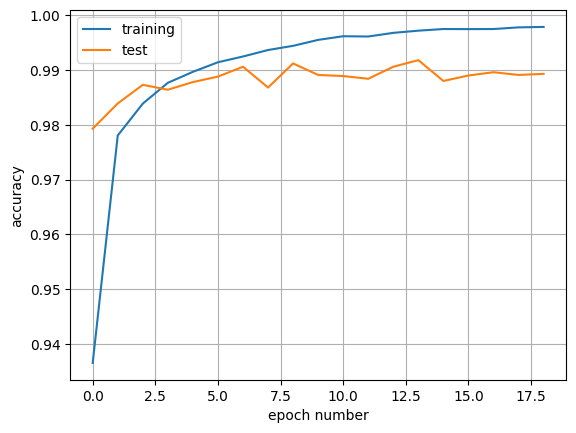

In [56]:
plt.plot(history.history['accuracy'], label='training')
plt.plot(history.history['val_accuracy'], label='test')
plt.grid()
plt.legend()
plt.xlabel('epoch number')
plt.ylabel('accuracy')
plt.show

The model reached an accuracy over 99%. There's a slight overfitting above 5 epochs

In [57]:
from keras.models import load_model
best_model = load_model('best_model.hdf5')

y_pred = np.argmax(best_model.predict(X_test_tensor),axis=1)
y_pred

313/313 [==============================] - 1s 2ms/step


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [58]:
score_cnn = np.mean(y_pred == y_test)
print(score_cnn)

0.9918


In [59]:
# Save info
summary_models.loc['Convolutional NN'] = {'Score': score_cnn}

We could make a final step forward, squeezing the maximum out of this convolutional NN, just increasing the number of nodes of the last NN. Since it will be bigger, we can use a dropout:

In [60]:
model = Sequential()

# 1st convolutional layer
model.add(Conv2D(filters=24, kernel_size=(5, 5), padding='same', activation='relu', input_shape=(28,28,1)))
model.add(AveragePooling2D()) # with this line, we go from an 28x28 to a 14x14 image

# 2nd convolutional layer
model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='valid', activation='relu'))
# with padding='valid' the image is reduced from 14x14 to 10x10
model.add(AveragePooling2D())  # with this line, we go from an 10x10 to a 5x5 image

model.add(Flatten())  # the network from 2D to 1D 

# 3rd convolutional layer
model.add(Dense(units=480, activation='relu'))
model.add(Dropout(0.5)) # since the network is bigger, we use dropout

# 4th convolutional layer
model.add(Dense(units=336, activation='relu'))
model.add(Dropout(0.5)) # since the network is bigger, we use dropout

# 5th convolutional layer
model.add(Dense(units=10, activation='softmax'))


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # adam is an adaptive optimizer that uses stochastic gradient descent to find the best parameters

early_stopping_monitor = EarlyStopping(patience=5, monitor='val_accuracy')  

model_checkpoint_callback = ModelCheckpoint(filepath='best_model.hdf5', 
                                                monitor='val_accuracy', 
                                                mode='auto', 
                                                save_best_only=True,
                                                verbose=1)

history = model.fit(X_train_tensor, y_train_dummies, 
            validation_data=(X_test_tensor, y_test_dummies),
            epochs=30,
            callbacks=[early_stopping_monitor, model_checkpoint_callback])

Epoch 1/30
1875/1875 [==============================] - ETA: 0s - loss: 0.1914 - accuracy: 0.9418
Epoch 1: val_accuracy improved from -inf to 0.98530, saving model to best_model.hdf5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1914 - accuracy: 0.9418 - val_loss: 0.0498 - val_accuracy: 0.9853
Epoch 2/30
1874/1875 [============================>.] - ETA: 0s - loss: 0.0645 - accuracy: 0.9820
Epoch 2: val_accuracy improved from 0.98530 to 0.99120, saving model to best_model.hdf5
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0645 - accuracy: 0.9821 - val_loss: 0.0284 - val_accuracy: 0.9912
Epoch 3/30
1875/1875 [==============================] - ETA: 0s - loss: 0.0477 - accuracy: 0.9860
Epoch 3: val_accuracy did not improve from 0.99120
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0477 - accuracy: 0.9860 - val_loss: 0.0367 - val_accuracy: 0.9888
Epoch 4/30
1875/1875 [==============================] - ETA: 0s - loss: 0.038

Very good, we managed to increase a bit more the accuracy: 99.4%

<function matplotlib.pyplot.show(close=None, block=None)>

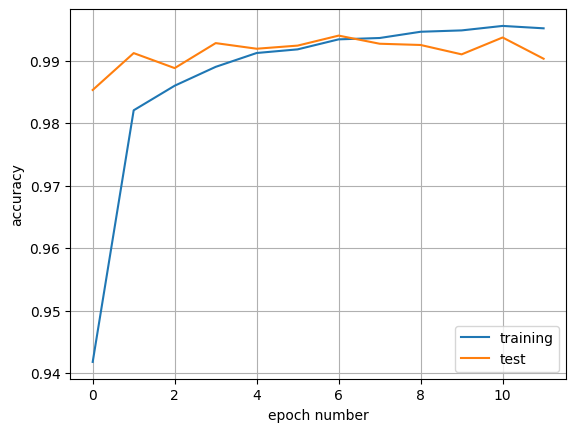

In [61]:
plt.plot(history.history['accuracy'], label='training')
plt.plot(history.history['val_accuracy'], label='test')
plt.grid()
plt.legend()
plt.xlabel('epoch number')
plt.ylabel('accuracy')
plt.show

There is no significant overfitting. Very good!

In [62]:
from keras.models import load_model
best_model = load_model('best_model.hdf5')

y_pred = np.argmax(best_model.predict(X_test_tensor),axis=1)
y_pred

313/313 [==============================] - 1s 4ms/step


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [63]:
score_cnn_enlarged = np.mean(y_pred == y_test)
print(score_cnn_enlarged)

0.994


In [64]:
# Save info
summary_models.loc['Convolutional NN enlarged and dropout'] = {'Score': score_cnn_enlarged}

Lets print some images with the correspondent prediction:

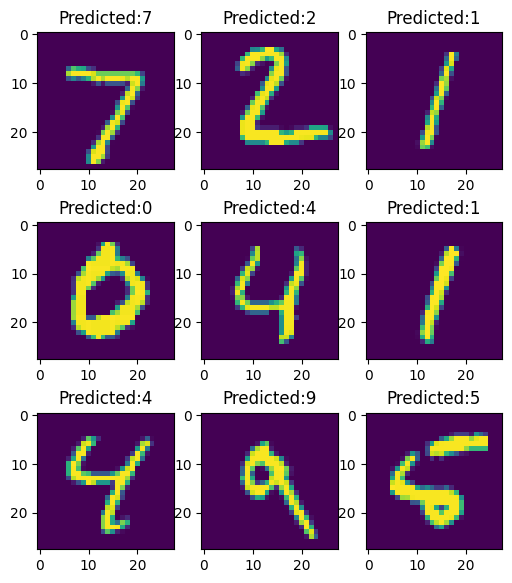

In [65]:
plt.figure(figsize=[6,7])
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test[i, :])
    plt.title('Predicted:'+str(y_pred[i]))
plt.show()

In these samples, every number is well recognized. After all, with 99.4% accuracy we should have an error every 200 images.

## Conclusion <a id='conclusion'></a>

The challenge we had in mind when started this project was to build a model that could identify handwritten digits with an accuracy greater than 99%. We initially faced the problem with a regression model. This was deliberately done to show how low was the accuracy with such algorithm. Even when we tuned up with activation function and scaling data, the score did not go higher than 70%.

Then we used a basic classification model and there was a consistent step forward in term of accuracy. After using, more hidden layers, more nodes and dropout to avoid overfitting, we improved the accuracy of ~0.5%.

The final step was about using a convolutional NN (LeNet 5) and improving it with more nodes and the use of Dropout. Accuracy reached around 99.4%.

In [67]:
summary_models.round(3)

,Score
Regression,0.095
Regression with ReLU,0.466
Regression with ReLU + scaled data,0.679
Classification with 1 layer and 100 nodes,0.977
Classification with 2 layer and 1000 nodes,0.976
"Classification with 2 layers, 1000 nodes and dropout",0.983
Convolutional NN,0.992
Convolutional NN enlarged and dropout,0.994


We can finally say that we accomplished what we had in mind at the beginning.